# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
#сформируем датасет
data_link = 'https://code.s3.yandex.net/datasets/real_estate_data.csv'
df = pd.read_csv(data_link, sep='\t')

In [3]:
display (df.head())
display (df.tail())
display (df.sample(10))
display (df.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,...,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20645,9,4100000.00,36.40,2016-02-07T00:00:00,2,NaN,9.00,21.00,3,False,...,7.00,0.00,Санкт-Петербург,40107.00,11810.00,2.00,460.00,0.00,NaN,186.00
15025,8,6700000.00,84.60,2018-01-23T00:00:00,3,3.40,4.00,58.70,2,NaN,...,10.00,NaN,Санкт-Петербург,26487.00,5334.00,1.00,480.00,1.00,373.00,NaN
606,5,790000.00,38.60,2018-04-03T00:00:00,2,3.00,2.00,24.00,1,NaN,...,6.00,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,374.00
11846,9,3150000.00,31.40,2017-10-04T00:00:00,1,2.53,12.00,16.60,10,NaN,...,7.10,0.00,Санкт-Петербург,33010.00,10565.00,2.00,330.00,0.00,NaN,28.00
9720,6,6498000.00,39.90,2017-05-03T00:00:00,1,2.70,14.00,15.31,9,NaN,...,11.70,1.00,Санкт-Петербург,19553.00,4762.00,0.00,NaN,1.00,533.00,327.00
12333,0,10000000.00,80.00,2017-01-21T00:00:00,3,NaN,5.00,42.70,2,NaN,...,9.00,0.00,Санкт-Петербург,22506.00,2048.00,0.00,NaN,2.00,569.00,3.00
23459,12,5000000.00,57.00,2017-07-01T00:00:00,3,NaN,9.00,42.00,4,NaN,...,6.00,1.00,Санкт-Петербург,50908.00,14970.00,0.00,NaN,0.00,NaN,28.00
20728,8,4980000.00,60.00,2017-02-12T00:00:00,3,2.50,5.00,46.00,4,NaN,...,6.40,NaN,Санкт-Петербург,44053.00,16556.00,0.00,NaN,0.00,NaN,552.00
4320,20,19700000.00,146.30,2017-02-10T00:00:00,3,3.40,6.00,55.80,6,NaN,...,56.20,NaN,Санкт-Петербург,23312.00,2450.00,1.00,548.00,3.00,883.00,638.00
5022,10,7300000.00,57.00,2017-09-11T00:00:00,1,NaN,25.00,NaN,5,NaN,...,NaN,0.00,Санкт-Петербург,36827.00,12348.00,1.00,485.00,1.00,474.00,43.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

In [4]:
df.duplicated().sum() #поиск явных дубликатов

0

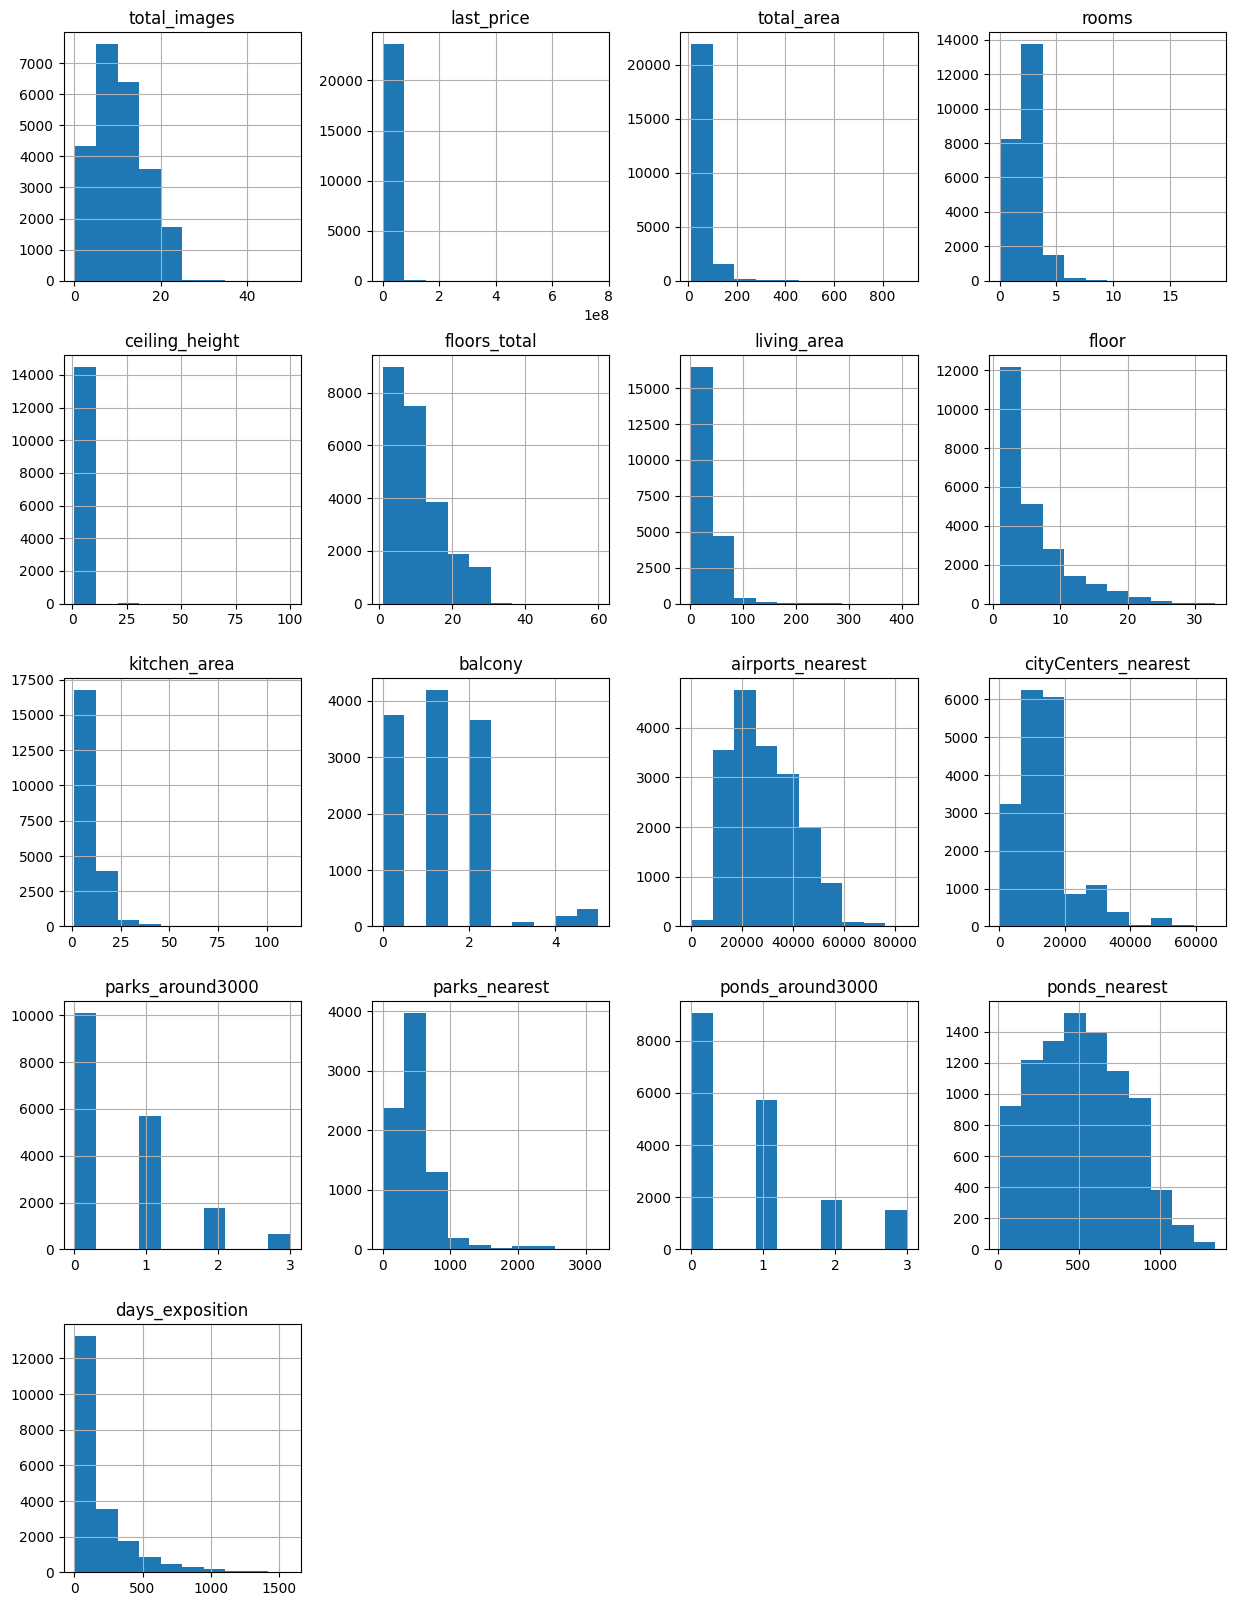

In [5]:
df.hist(figsize=(15, 20));

Файл содержит информацию по 23699 объектам недвижимости. Согласно документации к данным:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В общей информации о данных можно увидеть первые проблемы в данных.

### Выводы
Работы непочатый край

### Предобработка данных

В датафрейме присутствуют проблемные данные. Рассмотрим их поподробней.


In [6]:
#Столбец first_day_exposition имеет избыточные данные.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1d') #Уберем время.

- [x] 1 Столбец ceiling_height - высота потолков (м). Высота потолка 10 и более это скорее всего неверные данные. Скорее всего данные были внесены неверно. Минимальная высота потолка по нормативним документам составляет 2.1 метра. Максимальная может достигать 4.5 в домах старой застройки. Большинство квартир из данных имеют от 2.5 до 3.5 м. Остальные данные нереалистичные. Данные от 21 до 32 скорее всего записанны неверно, разделим их на 10. Пропуски заполним медианными значениями.

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

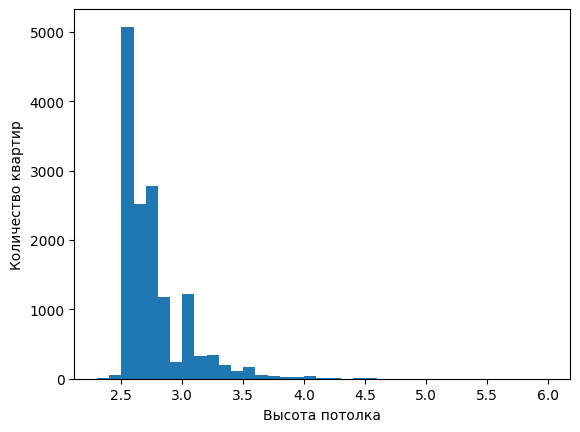

In [7]:
display (df['ceiling_height'].sort_values().unique())
display (df['ceiling_height'].value_counts())
plt.hist(df[df['ceiling_height'].notna()].ceiling_height, bins=37, range=(2.3, 6))
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

In [8]:
df.loc[(df['ceiling_height'] >= 21) & (df['ceiling_height'] <= 32), 'ceiling_height'] = df['ceiling_height'] / 10
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].describe() #посмотрим результат

count   23699.00
mean        2.70
std         0.69
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

- [x] 2 floors_total — всего этажей в доме. Часть данных пропущенны. Скорее всего ее не внесли. Точно определить этажность здания не представляется возможным. Заполним пропущенные значение этажом квартиры.

In [9]:
display (df['floors_total'].sort_values().unique())
df['floors_total'].isna().sum()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

86

In [10]:
df.loc[(df['floors_total'].isna()), 'floors_total'] = df['floor']
df['floors_total'].isna().sum() #посмотрим результат

0

        Большинство квартир с потерянными жилой площадью и площадью кухни - не студии и не свободной планировки, видимо, их владельцы не указали информацию. К сожалению, достоверного способа заполнить пропуски. Для квартир-студий площадь кухни назначим 0. Для остальных квартир площадь кухни, а также жилую площадь посчитаем как долю от общей площади. Величину доли посчитаем медианную для квартир с аналогичным количеством комнат.
        Помимо этого обнаружилимь квартиры с общей площадью меньшей или равной сумме жилой и кухни. Для таких квартир примем что жилая площадь равна 80% общей.

- [x] 3 living_area — жилая площадь в квадратных метрах (м²).

In [11]:
display (df['living_area'].sort_values().unique())
df['living_area'].isna().sum()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

1903

In [12]:
for i in range(0, df['rooms'].max()):
    df['living_area'] = df['living_area'].fillna(value = df['total_area'] * 
        ((df[df['rooms'] == i]['living_area'] / df[df['rooms'] == i]['total_area']).median()))
df['living_area'].isna().sum() #посмотрим результат

0

- [x] 4 kitchen_area — площадь кухни в квадратных метрах (м²). Не указанный размер кухни может означать ее отсутствие (в случае студии) или не заполненые данные.

In [13]:
display (df['kitchen_area'].sort_values().unique())
df['kitchen_area'].isna().sum()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

2278

In [14]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0 
for i in range(1, df['rooms'].max()):
    df['kitchen_area'] = df['kitchen_area'].fillna(value = df['total_area'] * 
        ((df[df['rooms'] == i]['kitchen_area'] / df[df['rooms'] == i]['total_area']).median()))
df['kitchen_area'].isna().sum()

0

In [15]:
check = df['total_area'] - df['kitchen_area'] - df['living_area']
df[check <= 0]['rooms'].count() #квартиры с общей площадью меньшей или равной сумме жилой и кухни

250

In [16]:
df.loc[check <= 0, 'living_area'] = (df['total_area'] - df['kitchen_area']) * 0.8
check = df['total_area'] - df['kitchen_area'] - df['living_area']
df[check <= 0]['rooms'].count() #посмотрим результат

0

В столбцах airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пропущено много данных. Эти пропуски оставим без изменений - без точного адреса их не восстановить.

- [x] Решим сразу несколько проблем. 

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(value=False) #Нет информации от апартаментах. Значит не апартаменты.
df['balcony'] = df['balcony'].fillna(value=0) #Нет информации бо балконах. Значит нет балконов.
df.dropna(subset=['locality_name'], inplace=True) #Удалим данные без указанного города.

In [18]:
df[['floors_total', 'balcony']] = df[['floors_total', 'balcony']].astype(int) # этажи и балконы только целые числа
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}) #изменим неккоректное название


In [19]:
display (df['locality_name'].sort_values().unique())
len(df['locality_name'].unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

364

In [20]:
df['locality_name'] = df['locality_name'].str.lower() # сменим регист для поиска дубликатов.
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True) # возможно проблема с буквой Ё
len(df['locality_name'].unique()) #Удалось убрать часть

330

In [21]:
display (df.head())
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,109.66,9,False,...,39.39,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Выводы
Выполнена первая предобработка данных. 

* в поле "дата размещения" осталась только дата, без времени
* высоты потолков приведены к реалистичным
* пропущенные этажности зданий заполнены
* пропуски в жилых площадях и площадях кухнь заполнены
* пропущенные значения в полях "апартаменты" и "балкон" заполнены. После заполнения пропусков тип данных в столбце "апартаменты" булев, как и должно быть
* квартирам-студям назначено единое число комнат 0.
* столбец `cityCenters_nearest` переименован
* данные приведены к целочисленным, где это возможно

Пропуски в автоматически собранных данных могли появиться вследствие неполной или некорректной информации от пользователя.

### Посчитайте и добавьте в таблицу новые столбцы

Для анализа данных рассчитаем следующие параметры: цена квадратного метра квартиры, день недели, месяц и год публикации объявления, тип этажа - первый, последний, средний, а так же расстояние в км до центра города.

In [22]:
df['price_f_m'] = df['last_price'] / df['total_area'] # цена квадратного метра
df['day'] = df['first_day_exposition'].dt.weekday # день публикации объявления
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month #месяц публикации объявления
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year #год публикации объявления
df['floor_type'] = 'другой' #тип этажа квартиры
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'
df['city_centers_nearest_km'] = df['city_centers_nearest'] / 1000 #расстояние в км до центра города
display (df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_f_m,day,month,year,floor_type,city_centers_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.03
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,18.60
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,13.93
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,109.66,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.10


### Выводы
Новые параметры посчитаны на основе имевшихся ранее данных и помогут детальнее рассмотреть информацию об объектах.

### Проведите исследовательский анализ данных

Рассмотрим некоторые параметры квартир отдельно.
#### Площадь квартир

In [23]:
df['total_area'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]) # общие данные

count   23650.00
mean       60.33
std        35.66
min        12.00
5%         31.00
25%        40.00
50%        52.00
95%       116.00
99%       197.56
max       900.00
Name: total_area, dtype: float64

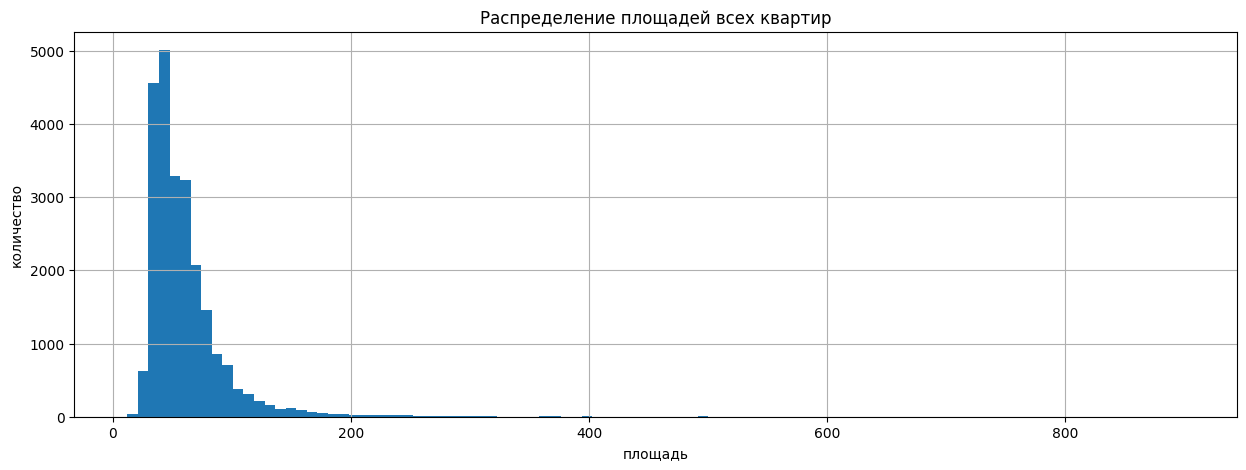

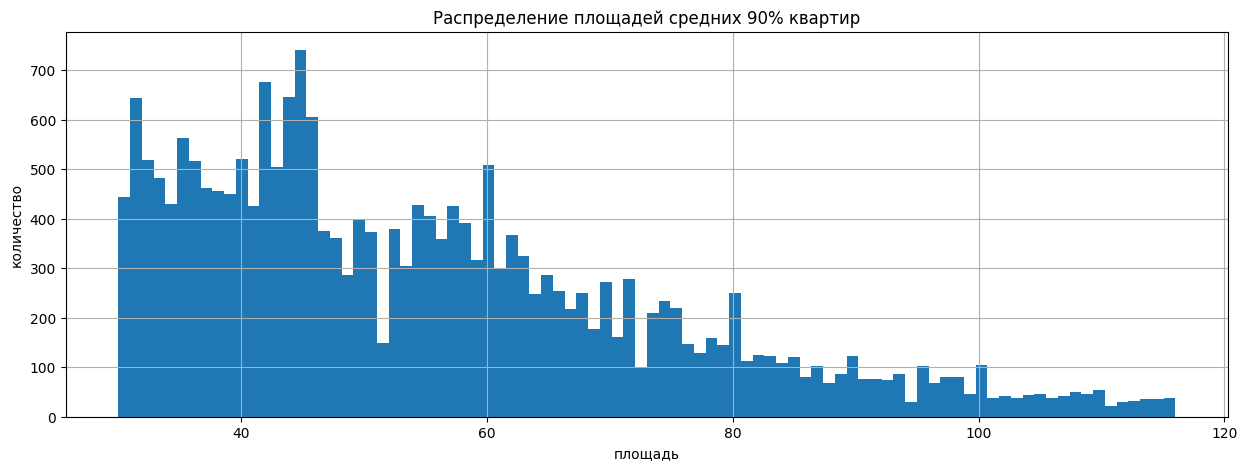

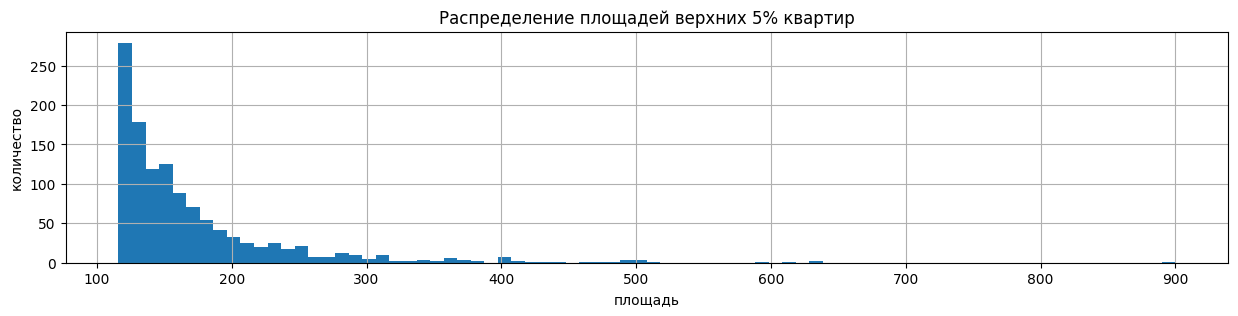

In [24]:
# гистограмма по всему интервалу
df.hist('total_area', bins=100, figsize=(15,5)) 
plt.title('Распределение площадей всех квартир')
plt.xlabel('площадь')
plt.ylabel('количество')
plt.show()
# гистограмма по средним 90%
df.hist('total_area', bins=90, range =(30, 116), figsize=(15,5))
plt.title('Распределение площадей средних 90% квартир')
plt.xlabel('площадь')
plt.ylabel('количество')
plt.show()
# гистограмма по верхним 5%
df.hist('total_area', bins=78, range =(116, 900), figsize=(15,3))
plt.title('Распределение площадей верхних 5% квартир')
plt.xlabel('площадь')
plt.ylabel('количество')
plt.show()

Распределение площадей вполне ожидаемое. Разница между средним и медианным значением небольшое, что означает что выбросы влияют не сильно. Большинство объектов до 116 квадратных метров, встречаются от 200 - менее 1% процента объектов - это можно объяснить существованием в Петербурге огромных коммунальных квартир или элитной недвижимостью. Значения от 650 до 900 - резко выделяються.

#### Количество комнат

In [25]:
display(df['rooms'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]))  # общие данные
df['total_area'].corr(df['rooms']) #корреляция между размером квартиры и количеством комнат

count   23650.00
mean        2.07
std         1.08
min         0.00
5%          1.00
25%         1.00
50%         2.00
95%         4.00
99%         5.00
max        19.00
Name: rooms, dtype: float64

0.7587447699123233

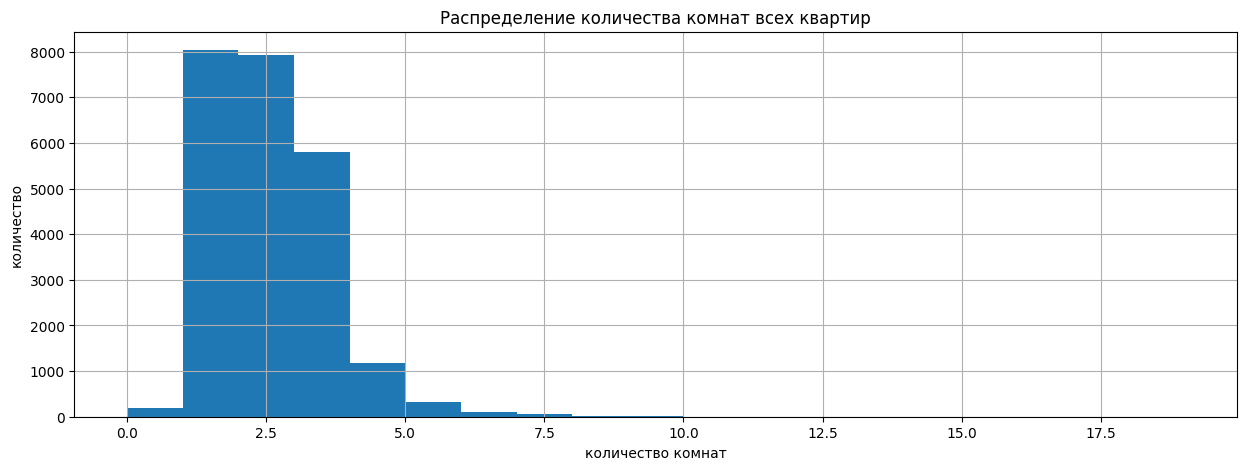

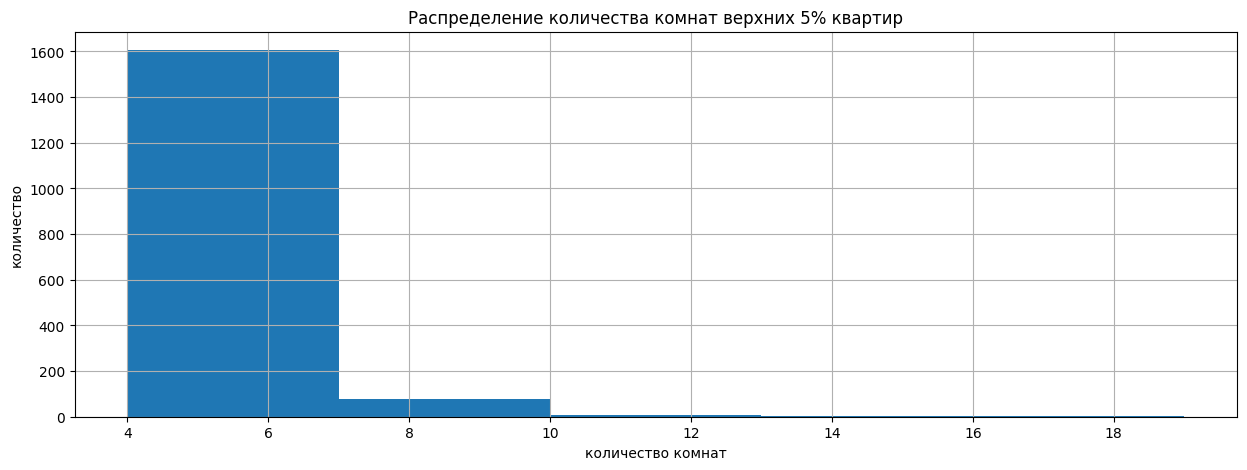

In [26]:
df.hist('rooms', bins=19, figsize=(15,5)) # гистограмма по всем объектам
plt.title('Распределение количества комнат всех квартир')
plt.xlabel('количество комнат')
plt.ylabel('количество')
plt.show()
df.hist('rooms', bins=5, range=(4, 19), figsize=(15,5)) 
plt.title('Распределение количества комнат верхних 5% квартир')
plt.xlabel('количество комнат')
plt.ylabel('количество')
plt.show()

Большинство объектов до 5 комнат, есть несколько от 6, их менее 1% процента объектов - это опять-таки можно объяснить существованием и относительной популярностью в Петербурге коммунальных квартир. Встречаются и объекты с 10+ квартирами, но это отдельные, выдающиеся случаи.
Корреляция между количеством комнат и площадью квартир высокая. Это понятно - чем больше помещений в квартире, тем больше должна быть ее общая площадь. 

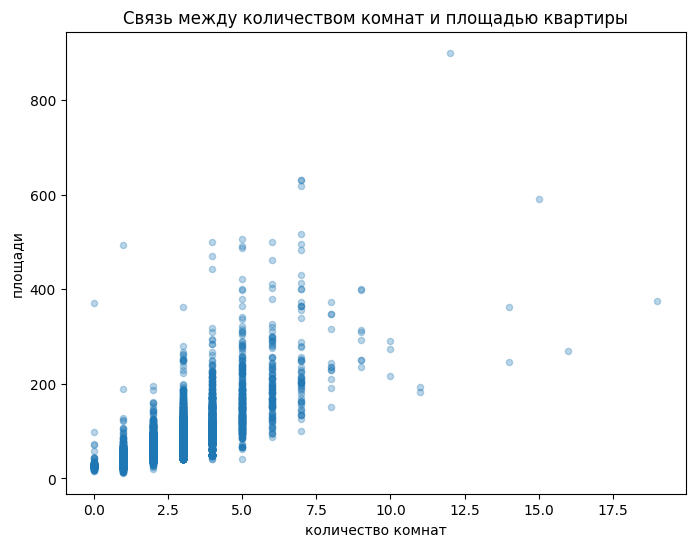

In [27]:
df.plot.scatter(x='rooms', y='total_area', figsize=(8,6), alpha=0.3) # соотношение площадей и количества комнат
plt.xlabel('количество комнат')
plt.ylabel('площади')
plt.title('Связь между количеством комнат и площадью квартиры')
plt.show()

Заметны выбивающиеся точки - студия более 300 метров, однушка в 500 квадратов и некоторые другие. А также начиная от 8 комнат выборки слишком мелкие и потому не достоверные.

#### Высота потолков

In [28]:
display(df['ceiling_height'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]))

count   23650.00
mean        2.70
std         0.69
min         1.00
5%          2.50
25%         2.60
50%         2.65
95%         3.12
99%         3.60
max       100.00
Name: ceiling_height, dtype: float64

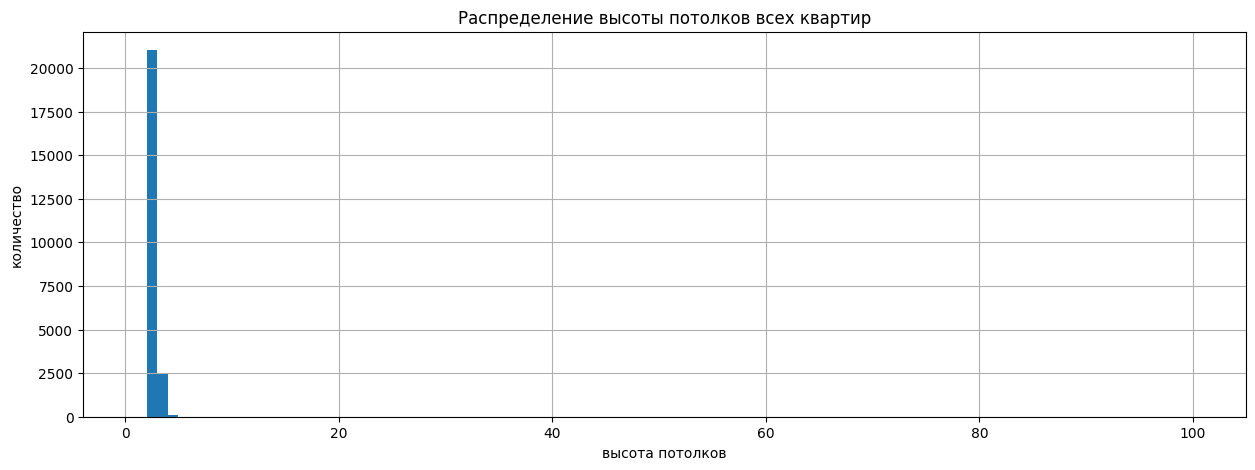

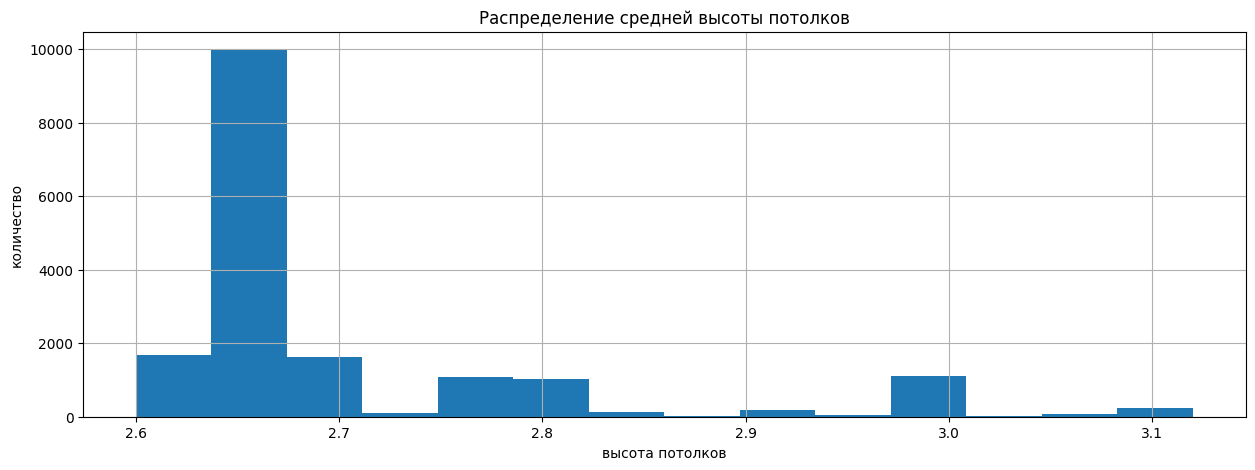

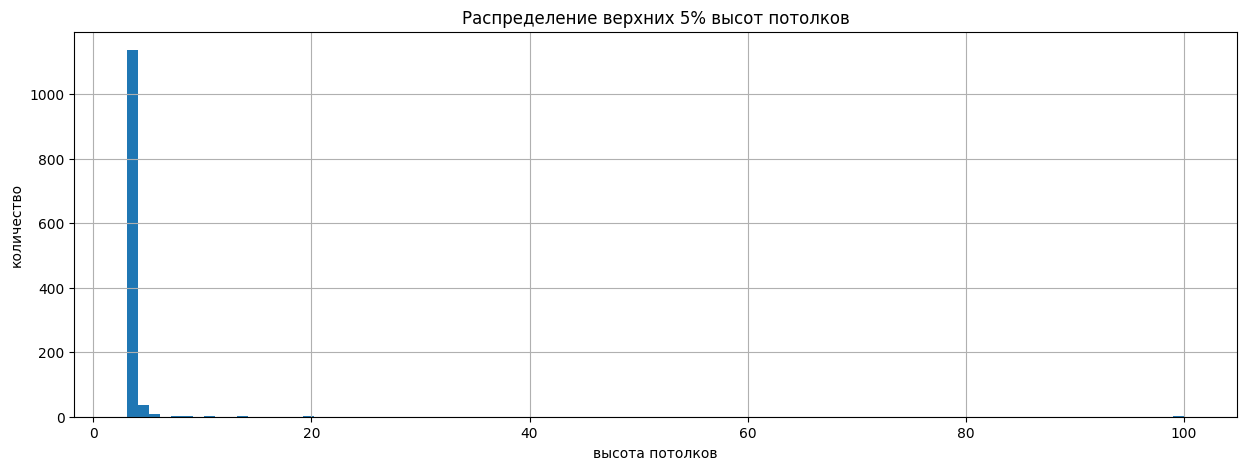

In [29]:
df.hist('ceiling_height', bins=100, figsize=(15, 5)) # гистограмма по всем объектам
plt.title('Распределение высоты потолков всех квартир')
plt.xlabel('высота потолков')
plt.ylabel('количество')
plt.show()
df.hist('ceiling_height', bins=14, range=(2.6, 3.12), figsize=(15, 5))
plt.title('Распределение средней высоты потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество')
plt.show()
df.hist('ceiling_height', bins=96, range=(3.12, 100), figsize=(15, 5))
plt.title('Распределение верхних 5% высот потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество')
plt.show()

Выбиваются явно неправдоподобные значения - менее 2 метров и более 6. Особенно квартира с высотой потолков 100 м.

#### Цена

In [30]:
display(df['last_price'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])) # общие данные

count       23650.00
mean      6541126.90
std      10896399.18
min         12190.00
5%        1864500.00
25%       3400000.00
50%       4650000.00
95%      15300000.00
99%      36000000.00
max     763000000.00
Name: last_price, dtype: float64

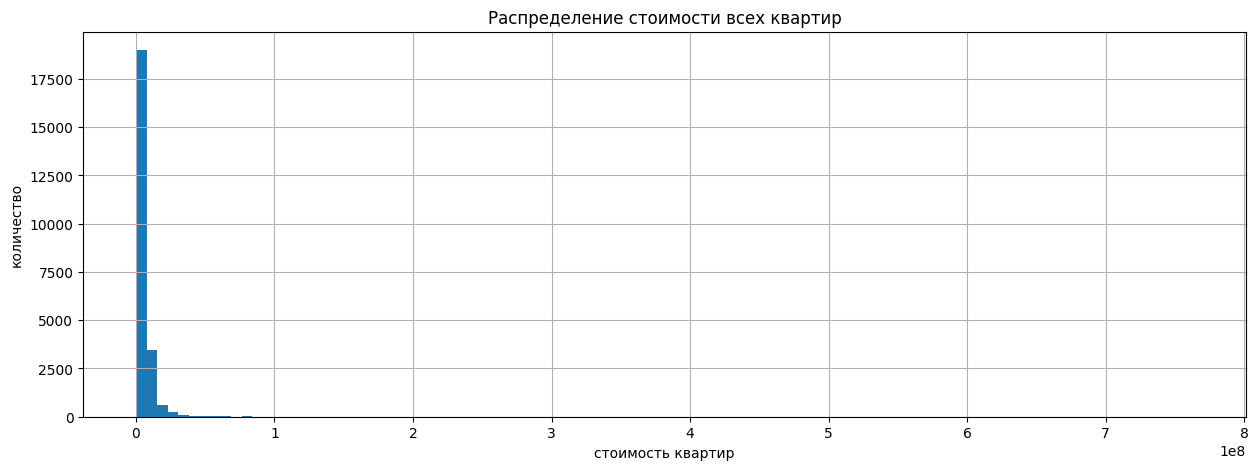

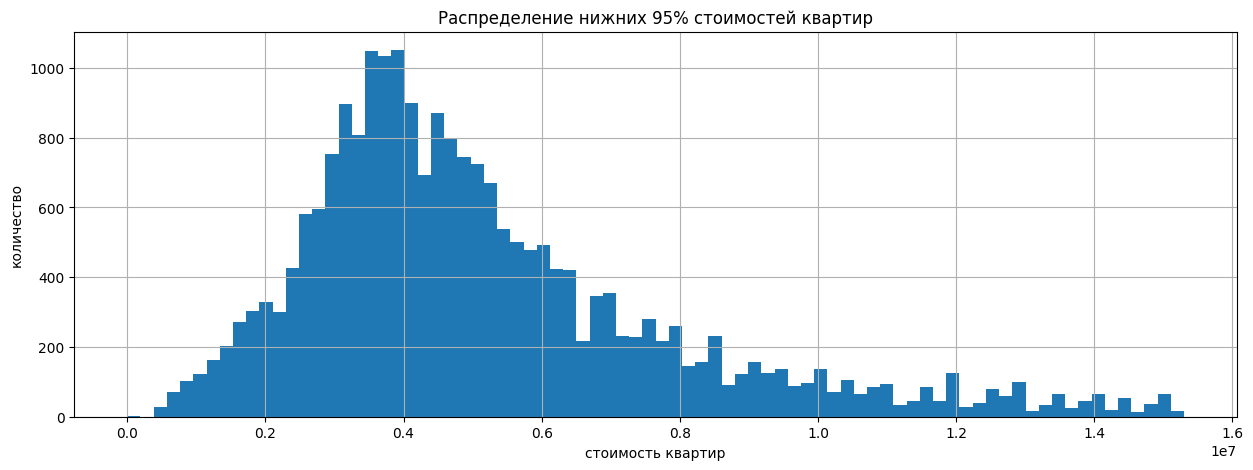

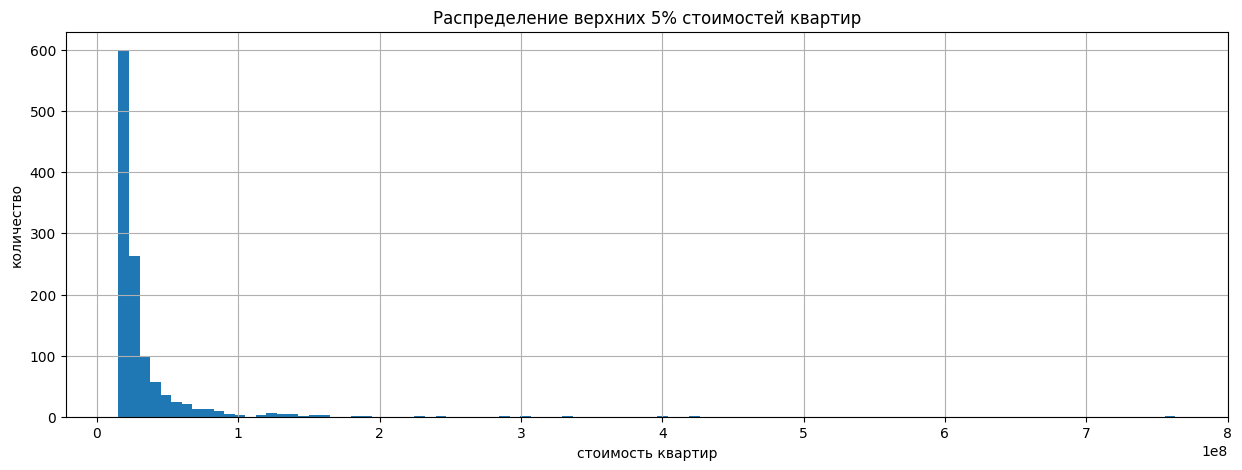

In [31]:
# гистограмма по всем объектам
df.hist('last_price', bins=100, figsize=(15, 5))
plt.title('Распределение стоимости всех квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()
# гистограмма по 95% 
df.hist('last_price', bins=80, range=(0, 15300000), figsize=(15, 5))
plt.title('Распределение нижних 95% стоимостей квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()
# гистограмма по верхним 5%
df.hist('last_price', bins=100, range=(15300001, 763000000), figsize=(15, 5))
plt.title('Распределение верхних 5% стоимостей квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()

Распределение стоимостей основной массы квартир - ожидаемое. Средняя стоимость - 6,5 млн, медианная - 4,65 млн. За сдвиг, судя по всему, ответственны экстремально высокие значения - выше 36 млн.
Выше 100 млн встречаются единичные объекты, меня смущает квартира стоимостью 762 000 000.

In [32]:
df[df['last_price'] == 763000000.00]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_f_m,day,month,year,floor_type,city_centers_nearest_km
12971,19,763000000.00,400.00,2017-09-30,7,2.65,10,250.00,10,False,...,530.00,3.00,756.00,33.00,1907500.00,5,9,2017,последний,3.96


Построим таже данные цены квадратного метра.

In [33]:
display(df['price_f_m'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])) # общие данные

count     23650.00
mean      99432.25
std       50337.94
min         111.83
5%        41271.57
25%       76614.97
50%       95000.00
95%      160727.23
99%      267234.23
max     1907500.00
Name: price_f_m, dtype: float64

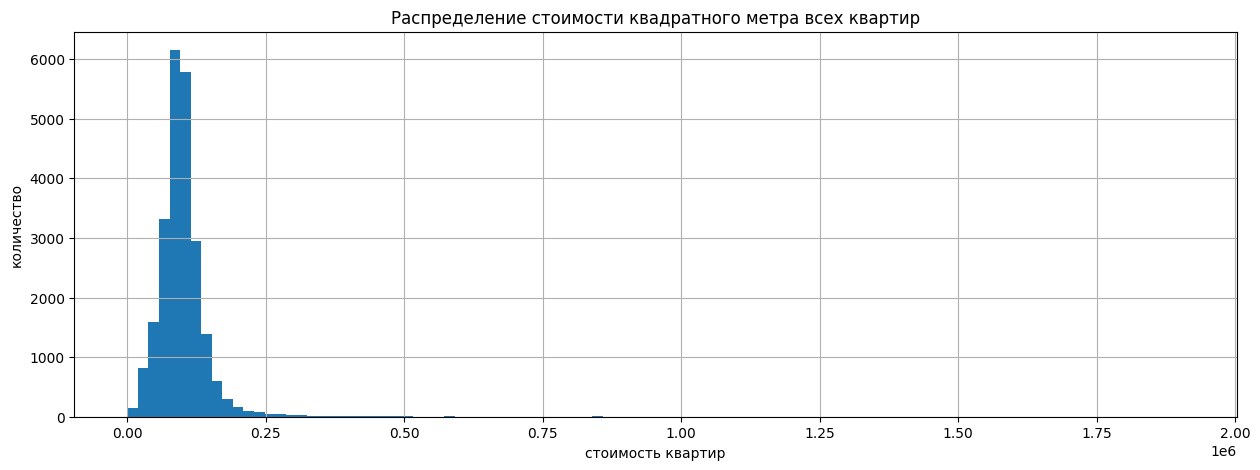

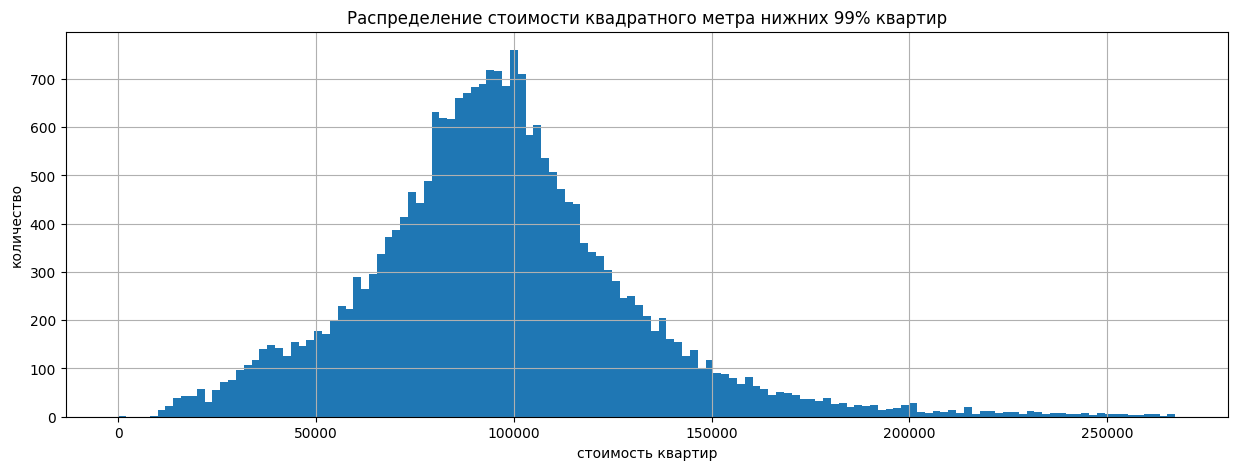

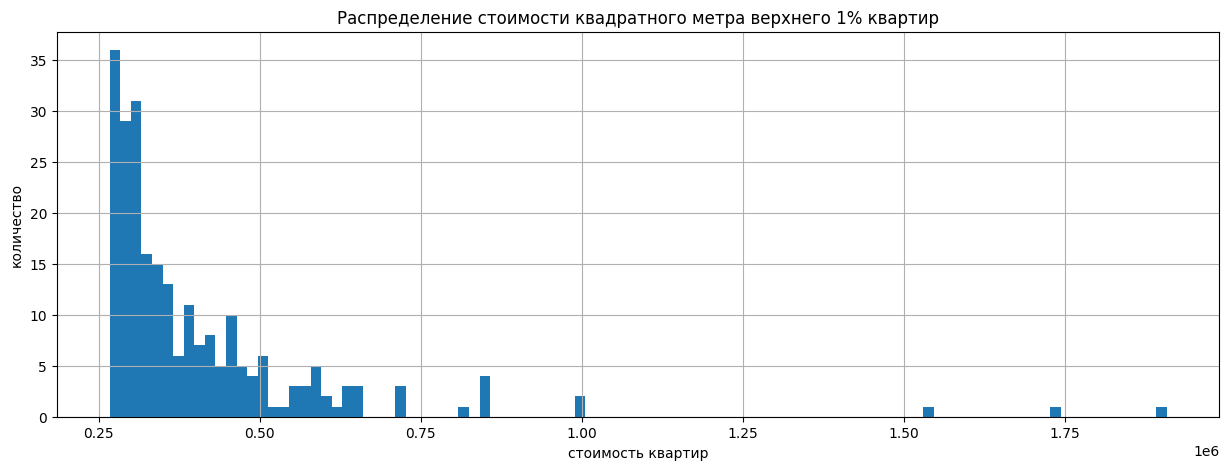

In [34]:
# гистограмма по всем объектам
df.hist('price_f_m', bins=100, figsize=(15, 5))
plt.title('Распределение стоимости квадратного метра всех квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()
# гистограмма по 99% 
df.hist('price_f_m', bins=135, range=(0, 267234), figsize=(15, 5))
plt.title('Распределение стоимости квадратного метра нижних 99% квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()
# гистограмма по верхнему 1%
df.hist('price_f_m', bins=100, range=(267235, 1907500), figsize=(15, 5))
plt.title('Распределение стоимости квадратного метра верхнего 1% квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()

Экстремальной можно назвать стоимость квадратого метра свыше 267 тыс.
Построим диаграмму взаимного распределения площади и стоимости квартир.

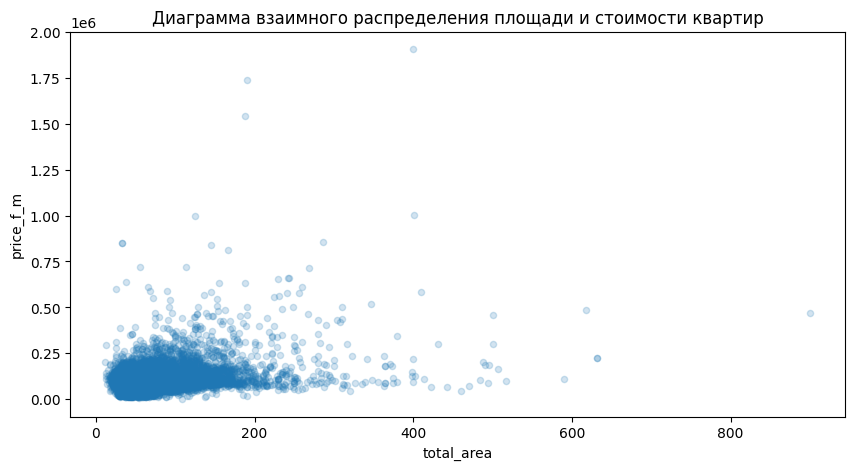

0.3022017010819025

In [35]:
df.plot.scatter('total_area', 'price_f_m', figsize=(10,5), alpha=0.2)
plt.title('Диаграмма взаимного распределения площади и стоимости квартир')
plt.show()
df['total_area'].corr(df['price_f_m']) #корреляция

Корреляция слабая, но на графике видно плотное облако точек и отдельные выбивающиеся объекты.

#### Время продажи квартиры

In [36]:
display(df['days_exposition'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])) # описание данных
print(df['days_exposition'].isna().sum()) # количество пропусков

count   20470.00
mean      180.75
std       219.78
min         1.00
5%          9.00
25%        45.00
50%        95.00
95%       647.55
99%      1069.00
max      1580.00
Name: days_exposition, dtype: float64

3180


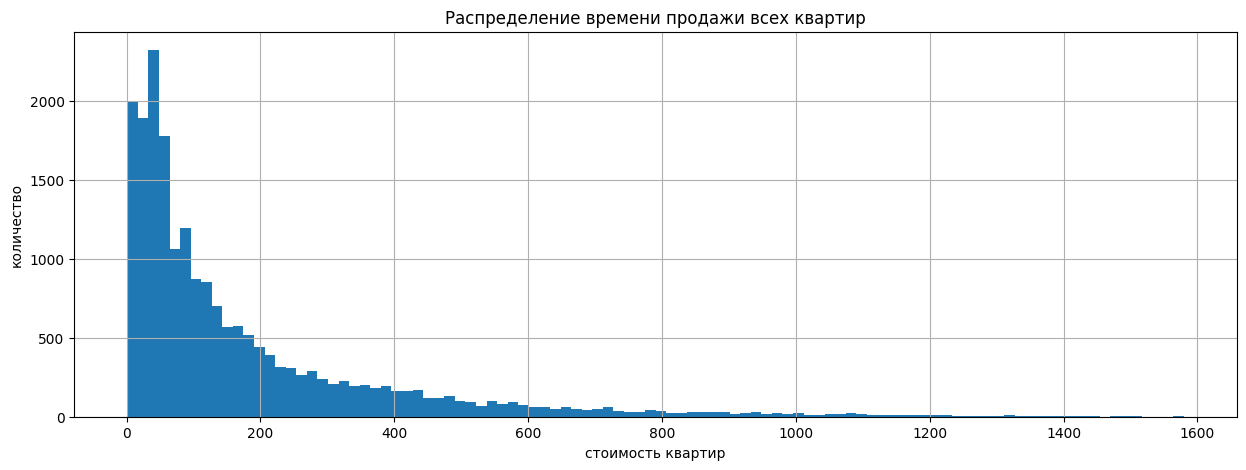

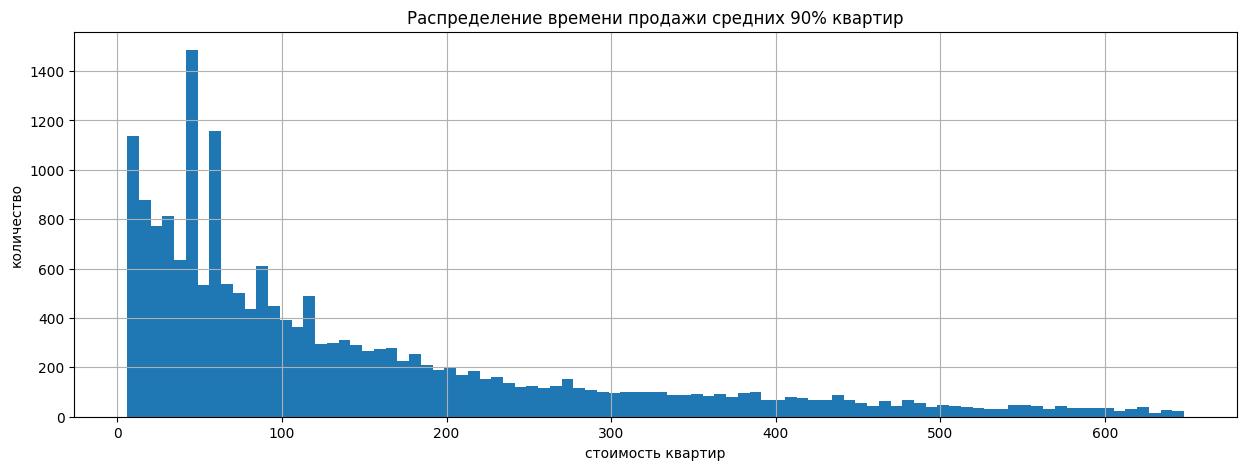

In [37]:
# гистограмма по всем длительностям
df.hist('days_exposition', bins=100, figsize=(15, 5))
plt.title('Распределение времени продажи всех квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()
# гистограмма по средним 90%
df.hist('days_exposition', bins=90, figsize=(15, 5), range=(6, 648))
plt.title('Распределение времени продажи средних 90% квартир')
plt.xlabel('стоимость квартир')
plt.ylabel('количество')
plt.show()

На графиках ясно видны пики. Попробуем их посмотреть

In [38]:
display (df.groupby('days_exposition')['first_day_exposition'].count().sort_values(ascending=False).head(10))

days_exposition
45.00    879
60.00    538
7.00     234
30.00    208
90.00    203
4.00     174
3.00     158
5.00     152
14.00    148
9.00     142
Name: first_day_exposition, dtype: int64

Среднее время продажи составляет 181 день, а медианное 95 дней. На такую разницу влияют экстремальные длительности - крайне долгие, свыше 500 дней, и крайне быстрые, меньше 9 дней. При этом у части объектов не указан срок продажи.

#### Редкие и выбивающиеся значения
Уберем из датафрема редкие значения

In [39]:
display (df.describe(percentiles=[0.05, 1/2, 0.95, 0.99]))
#Уберем из датафрема редкие значения
df_new = df.loc[(df['price_f_m'] < 270000) & (df['ceiling_height'] != 100) & (df['total_area']  < 116)]
# недостоверные высоты потолков заменим медианой
df_new.loc[(df_new['ceiling_height'] < 2.2) | (df_new['ceiling_height'] > 6), 'ceiling_height'] = df_new['ceiling_height'].median()
# посмотрим, что получилось
df_new.describe(percentiles=[0.05, 1/2, 0.95, 0.99])

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_f_m,day,month,year,city_centers_nearest_km
count,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,...,18140.00,8064.00,18140.00,9085.00,20470.00,23650.00,23650.00,23650.00,23650.00,18139.00
mean,9.86,6541126.90,60.33,2.07,2.70,10.67,35.06,5.89,10.85,0.59,...,0.61,490.83,0.77,518.06,180.75,99432.25,2.57,6.40,2017.37,14.20
std,5.68,10896399.18,35.66,1.08,0.69,6.59,22.95,4.88,6.56,0.96,...,0.80,342.55,0.94,277.84,219.78,50337.94,1.79,3.49,1.04,8.61
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,...,0.00,1.00,0.00,13.00,1.00,111.83,0.00,1.00,2014.00,0.18
5%,1.00,1864500.00,31.00,1.00,2.50,4.00,15.30,1.00,5.50,0.00,...,0.00,96.00,0.00,92.20,9.00,41271.57,0.00,1.00,2015.00,3.54
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.30,4.00,9.43,0.00,...,0.00,454.50,1.00,502.00,95.00,95000.00,3.00,6.00,2017.00,13.11
95%,20.00,15300000.00,116.00,4.00,3.12,25.00,70.10,16.00,21.30,2.00,...,2.00,968.00,3.00,977.00,647.55,160727.23,6.00,12.00,2019.00,31.65
99%,20.00,36000000.00,197.56,5.00,3.60,26.00,124.07,23.00,38.00,5.00,...,3.00,2102.00,3.00,1159.00,1069.00,267234.23,6.00,12.00,2019.00,50.07
max,50.00,763000000.00,900.00,19.00,100.00,60.00,435.17,33.00,123.86,5.00,...,3.00,3190.00,3.00,1344.00,1580.00,1907500.00,6.00,12.00,2019.00,65.97


C:\Users\Mlkhall\anaconda3\envs\da_practicum_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_f_m,day,month,year,city_centers_nearest_km
count,22357.00,22357.00,22357.00,22357.00,22357.00,22357.00,22357.00,22357.00,22357.00,22357.00,...,16895.00,7216.00,16895.00,8244.00,19513.00,22357.00,22357.00,22357.00,22357.00,16894.00
mean,9.78,5226013.97,54.35,1.95,2.68,10.80,31.46,5.92,10.08,0.60,...,0.58,495.46,0.73,526.79,174.88,94958.53,2.57,6.40,2017.39,14.67
std,5.60,3016414.54,19.44,0.90,0.19,6.64,13.58,4.92,4.54,0.95,...,0.77,343.90,0.91,277.19,212.81,32963.83,1.79,3.49,1.02,8.50
min,0.00,12190.00,12.00,0.00,2.20,1.00,2.00,1.00,0.00,0.00,...,0.00,1.00,0.00,13.00,1.00,111.83,0.00,1.00,2014.00,0.21
5%,1.00,1850000.00,30.90,1.00,2.50,4.00,15.20,1.00,5.45,0.00,...,0.00,96.00,0.00,97.00,9.00,40487.88,0.00,1.00,2015.00,4.01
50%,9.00,4500000.00,50.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,...,0.00,458.00,0.00,512.00,92.00,94051.45,3.00,6.00,2017.00,13.37
95%,20.00,11085443.20,93.92,3.00,3.00,25.00,56.20,16.00,18.00,2.00,...,2.00,980.00,3.00,982.00,622.00,149974.40,6.00,12.00,2019.00,31.97
99%,20.00,16000000.00,109.00,4.00,3.50,26.00,70.00,23.00,26.96,5.00,...,3.00,2102.00,3.00,1159.00,1043.00,196356.00,6.00,12.00,2019.00,50.12
max,50.00,29500000.00,115.90,7.00,5.80,60.00,93.60,33.00,60.00,5.00,...,3.00,3190.00,3.00,1344.00,1580.00,269736.84,6.00,12.00,2019.00,65.97


#### Исследование стоимости квартир
Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров.

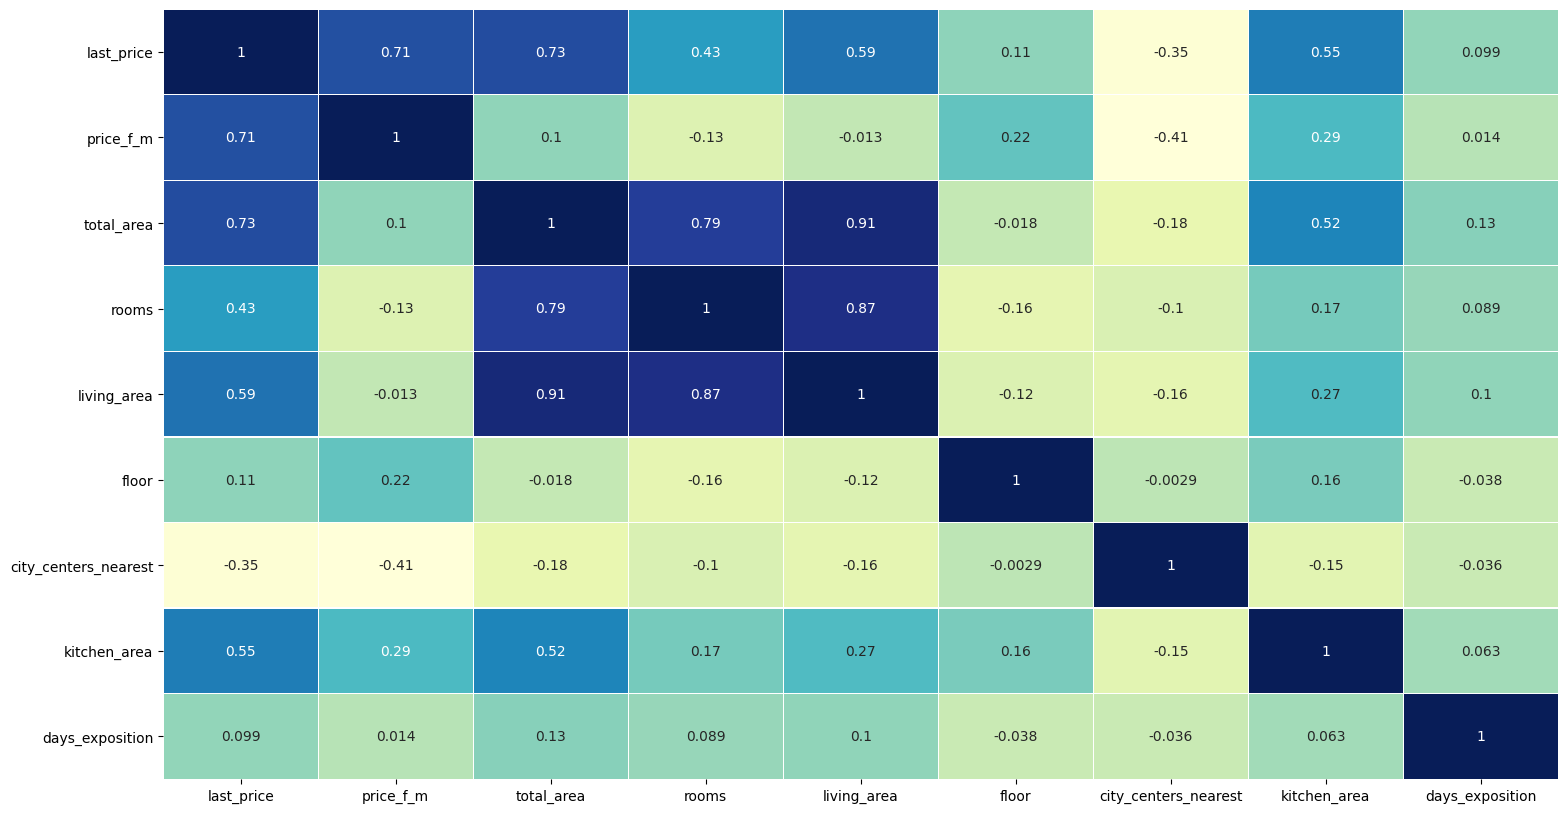

In [40]:
plt.figure(figsize=(18, 10))
seaborn.heatmap(df_new[['last_price', 'price_f_m', 'total_area', 'rooms', 'living_area',
         'floor', 'city_centers_nearest', 'kitchen_area', 'days_exposition']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

Рассмотрим связь ряда параметров с общей стоимостью.
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

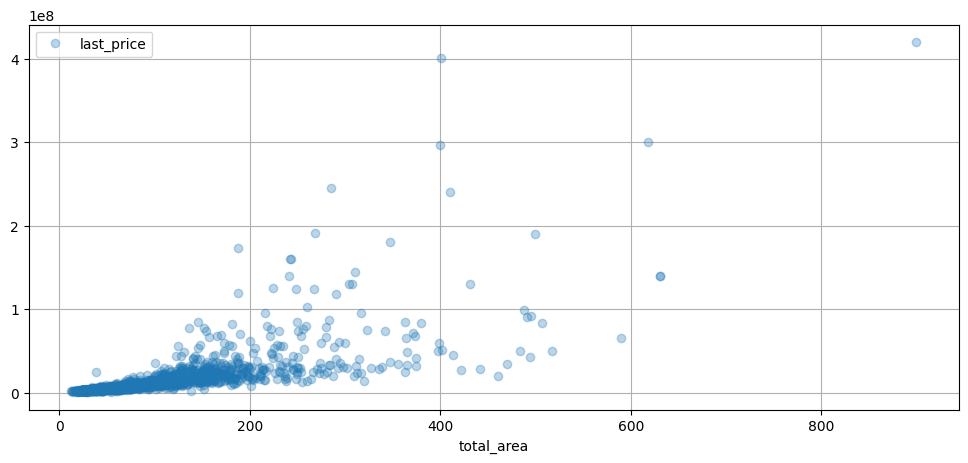

In [41]:
#зависимость общей площади и общей цены объекта
df.pivot_table(index=['total_area'], values='last_price').plot(grid=True, figsize=(12, 5), style='o', alpha=0.3);

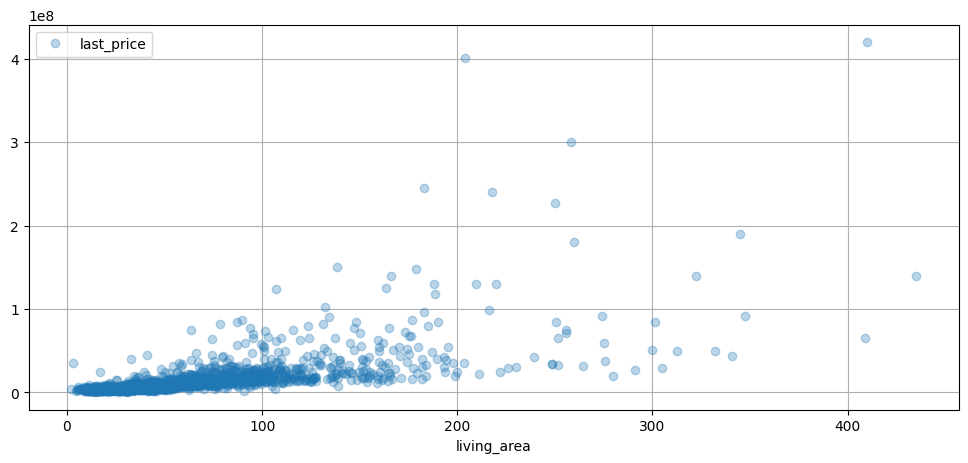

In [42]:
#зависимость жилой площади и общей цены объекта
df.pivot_table(index=['living_area'], values='last_price').plot(grid=True, figsize=(12, 5), style='o', alpha=0.3);

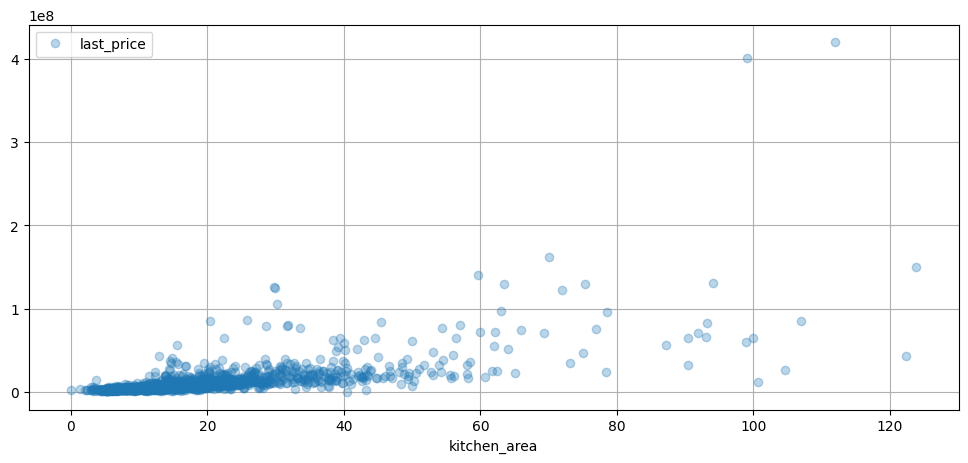

In [43]:
#зависимость площади кухни и общей цены объекта
df.pivot_table(index=['kitchen_area'], values='last_price').plot(grid=True, figsize=(12, 5), style='o', alpha=0.3);

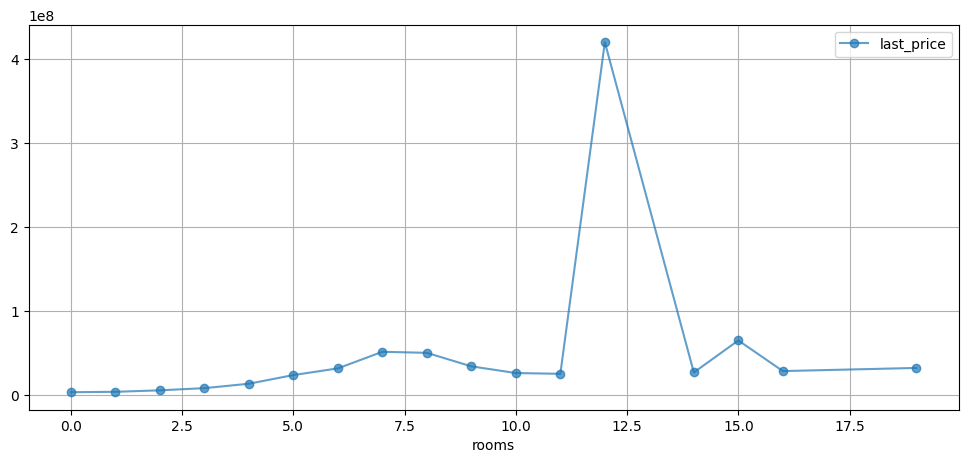

In [44]:
df.pivot_table(index=['rooms'], values='last_price').plot(grid=True, figsize=(12, 5), style='o-', alpha=0.7);

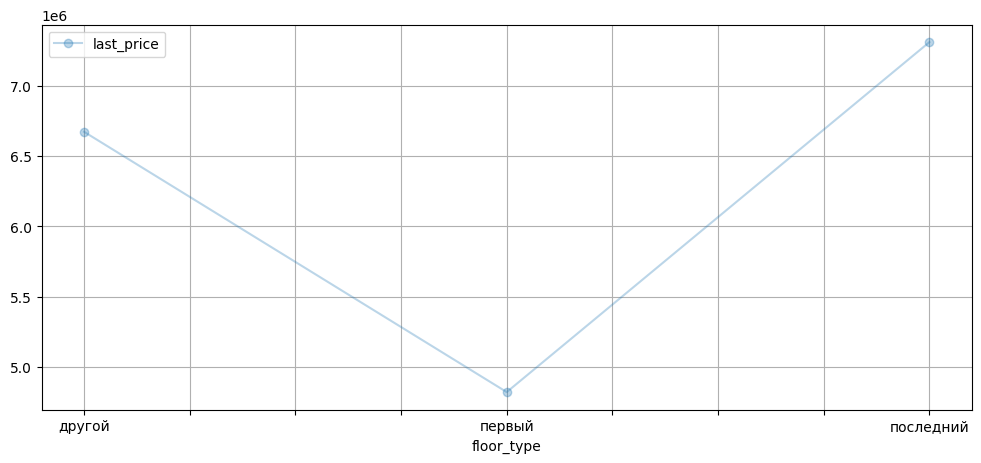

In [45]:
#зависимость этажа, на котором расположена квартира и общей цены объекта
df.pivot_table(index=['floor_type'], values='last_price').plot(grid=True, figsize=(12, 5), style='o-', alpha=0.3);

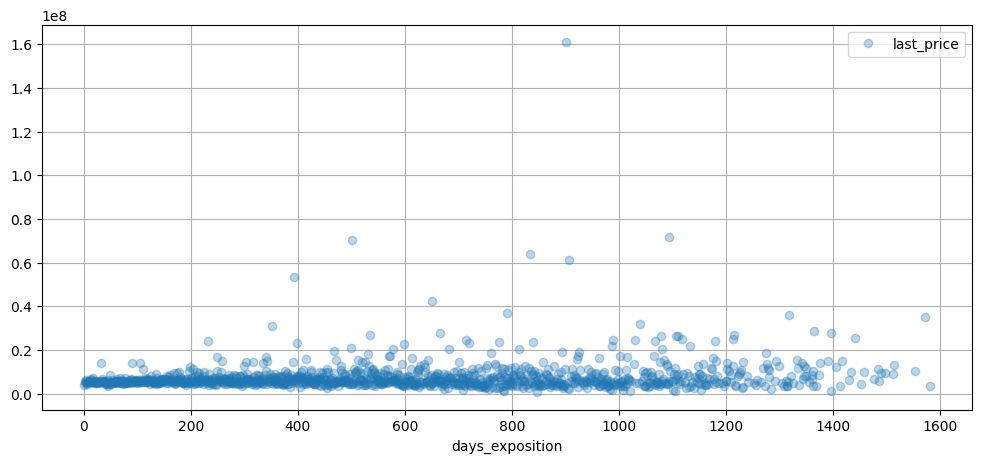

In [46]:
#зависимость даты размещения и общей цены объекта
df.pivot_table(index=['days_exposition'], values='last_price').plot(grid=True, figsize=(12, 5), style='o', alpha=0.3);

Сильная корреляция наблюдается между общей ценой объекта и его площадью, и между площадью и количеством комнат, что вполне ожидаемо. Так же можно отметить корреляцию между общей ценой и ценой 1 кв. м, общей ценой и количеством комнат и относительной площадью кухни и жилой зоной.

#### География
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Обобщим населенные пункты

In [47]:
def short(text):
    dict =['деревня ', 
           'коттеджный поселок ', 'садовое товарищество ', 
           'поселок городского типа ', 'поселок при железнодорожной станции ', 'поселок станции ', 
           'городской поселок ', 'садоводческое некоммерческое товарищество '
           'посёлок городского типа ', 'поселок имени', 'поселок ', 'село ']
    for i in dict:
        text = text.replace(i, '')  
    return text  
df_new['locality_name_short'] = df_new['locality_name'].apply(short)

C:\Users\Mlkhall\AppData\Local\Temp\ipykernel_6288\4280822347.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['locality_name_short'] = df_new['locality_name'].apply(short)


In [48]:
#Выберем 10 населенных пунктов с наибольшим числом объявлений.
display(df_new.groupby('locality_name_short')['first_day_exposition'].count().sort_values(ascending=False).head(10))

locality_name_short
санкт-петербург    14521
мурино               590
кудрово              471
шушары               437
всеволожск           394
пушкин               348
колпино              336
парголово            326
гатчина              304
выборг               228
Name: first_day_exposition, dtype: int64

In [49]:
# стоимость квадратного метра в 10 самых популярных населенных пунктах
df_new.pivot_table(index='locality_name_short', values=['price_f_m', 'last_price'], 
                aggfunc={'price_f_m':['count', 'median', 'mean'], 
                'last_price': ['count', 'median', 'mean']}).sort_values(by=[('price_f_m','count')], ascending=False).head(10)

last_price                       price_f_m            \
                         count       mean     median     count      mean   
locality_name_short                                                        
санкт-петербург          14521 6206690.04 5300000.00     14521 109178.72   
мурино                     590 3678462.20 3400000.00       590  86087.51   
кудрово                    471 4340341.32 3890000.00       471  95290.60   
шушары                     437 4073812.35 3950000.00       437  78704.89   
всеволожск                 394 3698822.50 3450000.00       394  67222.43   
пушкин                     348 5668922.31 5050000.00       348 102404.52   
колпино                    336 3853985.85 3600000.00       336  75370.03   
парголово                  326 4477608.77 4100000.00       326  90332.26   
гатчина                    304 3450461.71 3095000.00       304  68919.47   
выборг                     228 3070241.23 2800000.00       228  58225.62   

                               
                       median  
locality_name_short            
санкт-петербург     103724.60  
мурино               86175.64  
кудрово              95588.24  
шушары               76829.27  
всеволожск           65789.47  
пушкин               99678.55  
колпино              74723.75  
парголово            91780.22  
гатчина              67860.57  
выборг               58233.01

Однозначный лидер по количеству квартир в населенном пункте это СПб

#### Центр города

In [50]:
spb = df.query('locality_name == "санкт-петербург" & city_centers_nearest_km < 10')
spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_f_m,day,month,year,floor_type,city_centers_nearest_km
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,109.66,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.10
21,13,3200000.00,31.60,2018-03-14,1,2.65,5,16.90,2,False,...,248.00,0.00,NaN,310.00,101265.82,2,3,2018,другой,9.72
24,8,6500000.00,97.20,2015-10-31,2,2.65,3,46.50,1,False,...,411.00,3.00,124.00,265.00,66872.43,5,10,2015,первый,2.34
35,6,15500000.00,149.00,2017-06-26,5,2.65,5,104.00,4,False,...,NaN,1.00,779.00,644.00,104026.85,0,6,2017,другой,3.50
51,7,45000000.00,161.00,2017-10-17,3,3.20,8,38.00,4,False,...,NaN,3.00,99.00,541.00,279503.11,1,10,2017,другой,6.59
52,20,11795000.00,136.00,2017-09-22,6,3.00,2,94.00,2,False,...,526.00,0.00,NaN,NaN,86727.94,4,9,2017,последний,6.58
56,14,4350000.00,41.00,2016-03-28,1,2.80,7,18.10,4,False,...,271.00,1.00,439.00,152.00,106097.56,0,3,2016,другой,9.63
61,18,7990000.00,74.00,2017-08-24,2,2.65,4,43.00,4,False,...,363.00,0.00,NaN,609.00,107972.97,3,8,2017,последний,4.29
63,2,20000000.00,118.00,2018-09-11,3,3.00,9,68.00,7,False,...,648.00,1.00,779.00,37.00,169491.53,1,9,2018,другой,4.80


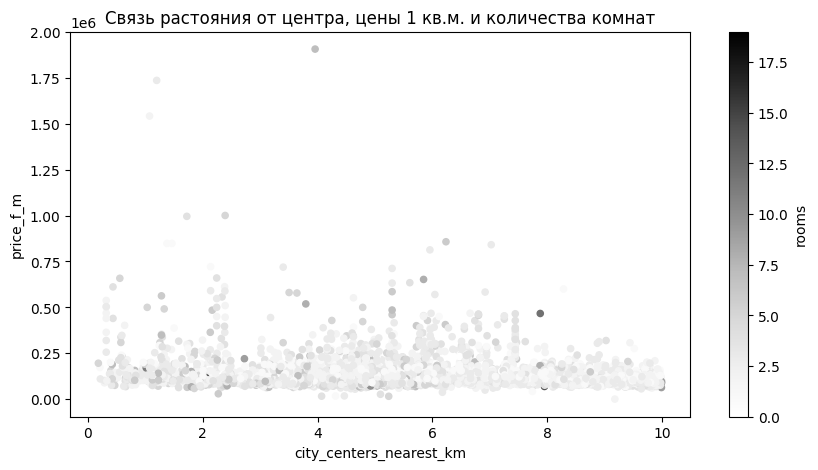

In [51]:
# построим график зависимости цены 1 кв. м. от общей площади 
spb.plot.scatter('city_centers_nearest_km', 'price_f_m', figsize=(10,5), alpha=1, c='rooms', sharex=False)
plt.title('Связь растояния от центра, цены 1 кв.м. и количества комнат')
plt.show()

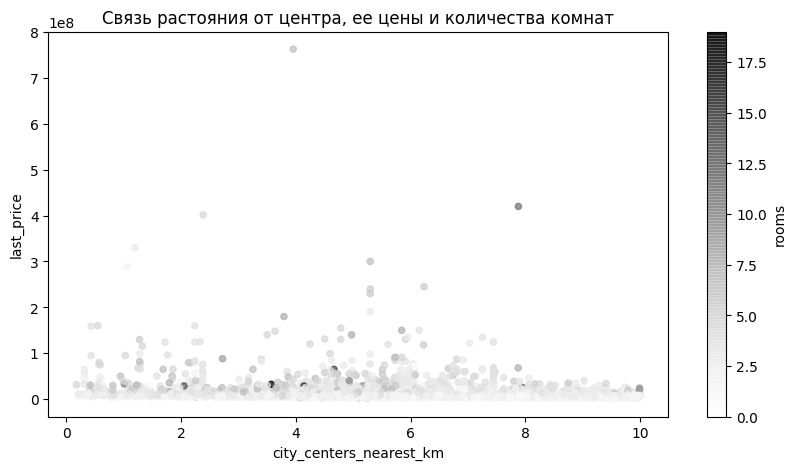

In [52]:
# построим график зависимости цены всей квартиры от общей площади 
spb.plot.scatter('city_centers_nearest_km', 'last_price', figsize=(10,5), alpha=0.7, c='rooms', sharex=False)
plt.title('Связь растояния от центра, ее цены и количества комнат')
plt.show()

Растояние до центра города не сильно влияет на цену. Попробуем построить другой график

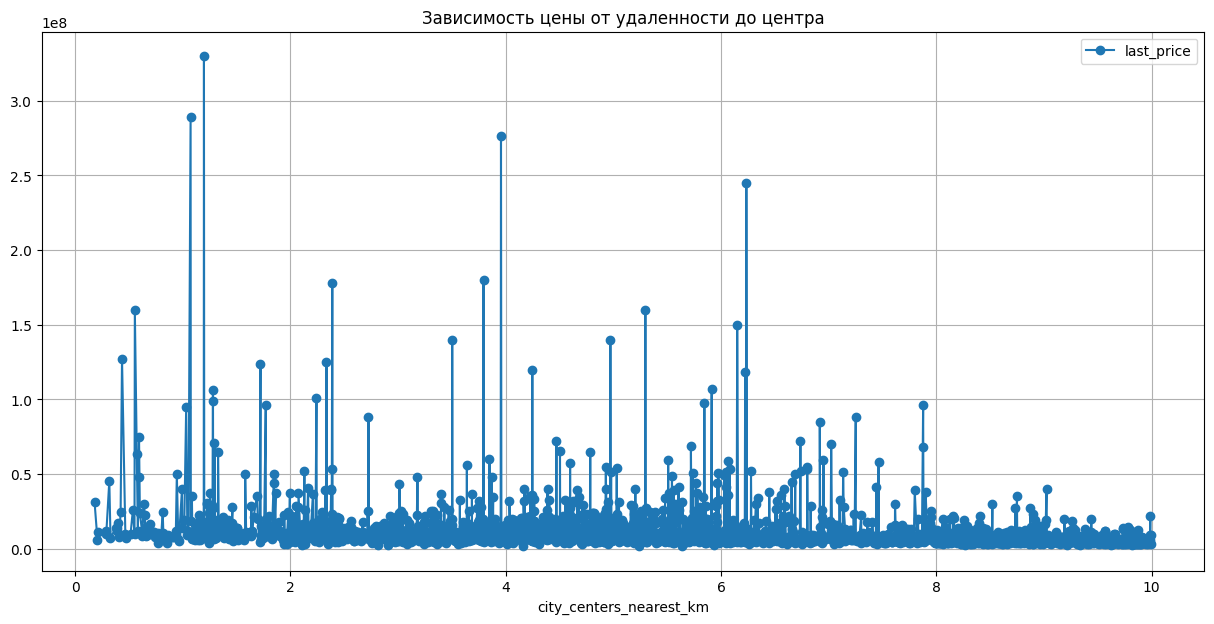

In [53]:
df.query('locality_name == "санкт-петербург" & city_centers_nearest_km < 10').pivot_table(
    index='city_centers_nearest_km', values='last_price'
).plot(style='o-', figsize=(15, 7), grid=True, title='Зависимость цены от удаленности до центра');

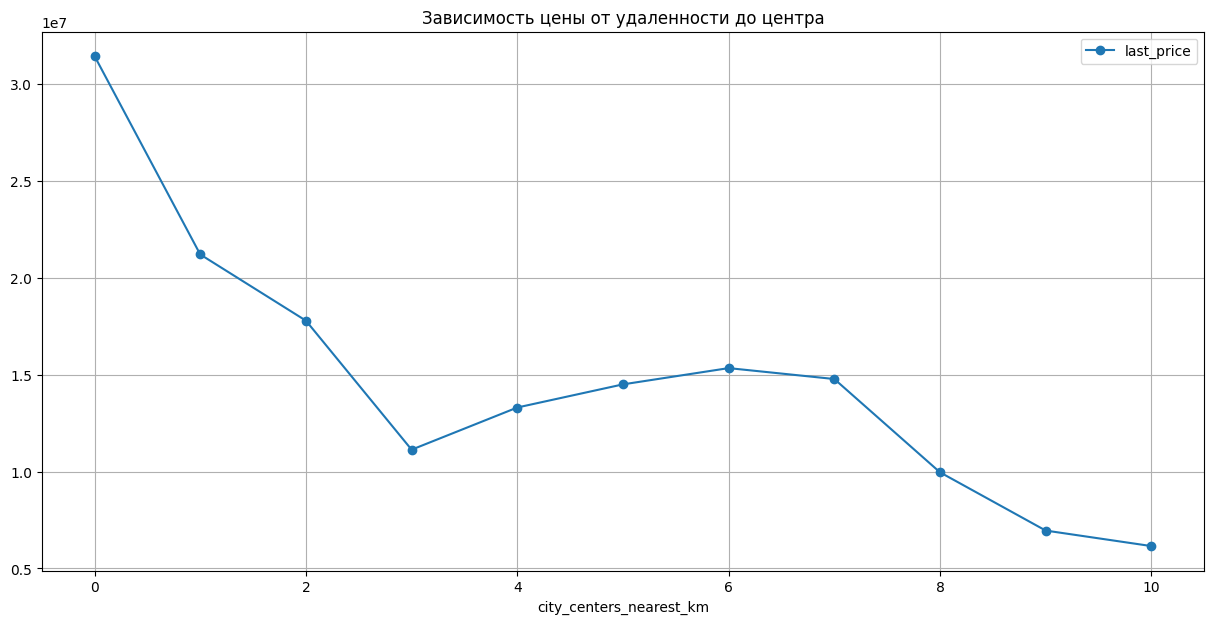

In [54]:
df.query('locality_name == "санкт-петербург" & city_centers_nearest_km < 10').round().pivot_table(
    index='city_centers_nearest_km', values='last_price'
).plot(style='o-', figsize=(15, 7), grid=True, title='Зависимость цены от удаленности до центра');

Действительно ясно видна линейная зависимость цены от растояния до центра. И при этом особенно важно оказалось использовать метод .round() который делает график гораздо более наглядным. Из за округления происходит определенная группировка что упорядочивает данные.

### Выводы
Мы детально рассмотрели объекты в имеющемся датасете.
Основная масса квартир имеет площадь до 116 квадратных метров при стоимости квадратного метра в среднем 100-160 тыс. Чаще всего на продажу уходит три месяца. Дороже всего квартиры в Санкт-Петербургах и его поселках-спутниках: Мурино, Кудрово, Шушарах. Как по центру Санкт-Петербурга, так и по всей Ленобласти, наблюдается только корреляция между общей ценой объекта и его площадью, и между площадью и количеством комнат. Так же присутствует линейная зависимость цены от растояния до центра.

### Общий вывод
В ходе работы была проведена предобработка данных - устранены некоторые пропуски, некорректные значения. Оптимизированы названия населенных пунктов. Скорее всего, часть некорректных и пропущенных значений является ошибками ввода или невозможностью обработать не полные данные.
Из полученного датасета можно сделать вывод, что в центре Петербурга квартиры дороже, чем на окраине или в городах-спутниках. Студии и однушки по цене квадратного метра являются лидерами, но при этом продаются быстрее всего. К тому же и количество их предложений самое большое.
Как по центру Санкт-Петербурга, так и по всей Ленобласти, наблюдается только корреляция между общей ценой объекта и его площадью, и между площадью и количеством комнат. Так же присутствует линейная зависимость цены от растояния до центра.

Для более точной оценки рыночной стоимости квартиры, на мой взгляд, следует учитывать и такие факторы, как расстояние до метро,  год постройки, наличие лифта, наличие газоснабжения, есть ли горячее водоснабжение. Стоимость квартиры при этом зависит от совокупности всех факторов.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.